<a href="https://colab.research.google.com/github/cecilia-wanja/Predicting-hypothyroid-in-patients/blob/master/Prediction_of_thyroid_patients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# QUESTION
Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. 
I will build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.



# METRICS OF SUCCESS


# CONTEXT
We have been provided for the following columns in the dataset;
1. Age
2. Sex
3. on_thyroxine
4. query_on_thyroxine
5. on_antithyroid_medicationthyroid_surgery
6. query_hypothyroid
7. query_hyperthyroid
8. pregnant
9. sick
10. tumor
11. lithium
12. goitre
13. TSH_measured
14. TSH
15. T3_measured
16. T3
17. TT4_measured
18. TT4

A simpler overview on the meaning of some terms portrayed above:
Thyroxine is the main hormone secreted into the bloodstream by the thyroid gland.

on_antithyroid_medicationthyroid_surgery is the column that shows the number of patients who are undergoing surgery to cure the disease.

query_hypothyroid shows the number of patients who's thyroid gland is unaderactive.

query_hyperthyroid shows the number of patients who's thyroid gland is hyperactive.

lithium shows the number of patients who have this component that can cause goitre and hypothhyroidsm.

goitre shows the number of people with either overproductive or underproductive thyroid glands.

TSH measured is a test done to find out whether the thyroid gland is working the way it should.

TSH is a test to find out the amount of hormone produces.

T3 & T4 are the major hormones produced by the thyroid glands.
Normal T3 ranges from 4.6 to 11.2.
Normal T4 should range from 5.0 to 12.0


# EXPERIMENTAL DESIGN

# APPROPRIATENESS OF THE DATA

# Loading Our Data

In [0]:
#importing our necessary libraries
import pandas as pd
#allows us to organize data in tabular form
import numpy as np
#numpy allows us to work with multi dimensional arrays
import scipy
#scipy-a python ecosystem used for mathematics, machine learning 
import matplotlib.pyplot as plt
#matplotlib-a 2D library for plotting numpy computations
import seaborn as sns
#seaborn-a python visualization based on matplotlib, helps in drawing attractive statistical graphics
import sklearn
#sklearn-used for machine learning, 
%matplotlib inline
#for visualization 
import statsmodels.api as sm
#statsmodel-used to run regression

In [0]:
#previewing the first five rows of our dataset.
df = pd.read_csv("hypothyroid.csv")
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


# Cleaning

In [0]:
#looking at the number of rows and columns respectively in our dataset
df.shape

(3163, 26)

In [0]:
#looking for any null values
df.isnull().any()

status                       False
age                          False
sex                          False
on_thyroxine                 False
query_on_thyroxine           False
on_antithyroid_medication    False
thyroid_surgery              False
query_hypothyroid            False
query_hyperthyroid           False
pregnant                     False
sick                         False
tumor                        False
lithium                      False
goitre                       False
TSH_measured                 False
TSH                          False
T3_measured                  False
T3                           False
TT4_measured                 False
TT4                          False
T4U_measured                 False
T4U                          False
FTI_measured                 False
FTI                          False
TBG_measured                 False
TBG                          False
dtype: bool

In [0]:
#looking for any duplicated data
df.duplicated().sum()

77

In [0]:
#removing the duplicated data
df.drop_duplicates(inplace = True)

In [0]:
#checking whether the duplicates are still there
df.duplicated().sum()

0

In [0]:
for columns in df.columns:
    print('/n')
    print(df[columns].unique())

/n
['hypothyroid' 'negative']
/n
['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']
/n
['M' 'F' '?']
/n
['f' 't']
/n
['f' 't']
/n
['f' 't']
/n
['f' 't']
/n
['f' 't']
/n
['f' 't']
/n
['f' 't']
/n
['f' 't']
/n
['f' 't']
/n
['f' 't']
/n
['f' 't']
/n
['y' 'n']
/n
['30' '145' '0' '430' '7.30' '138' '7.70' '21' '92' '48' '36' '15' '15.30'
 '25' '61' '28' '170' '54' '216' '56' '71' '46' '70' '34' '53' '9.40'
 '126' '10' '530' '35' '65' '57' '125' '23' '80' '117' '49' '66' '8.20'
 '150' '?' '18' '165' '164' '24' '90' '77' '19' '58' '100' '213' '17'
 '235' '153' '13' '31' '109' '260' '43'

In [0]:
#dealing with null values inform of ?
df = df.replace(['?'],np.nan)

In [0]:
#we will the replace with the mode of each and every column
for column in df.columns:
    df[column].fillna(df[column].mode()[0])


In [0]:
#testing if it has worked for the sex column
df.sex.unique

<bound method Series.unique of 0       M
1       F
2       M
3       F
4       M
5       F
6       F
7       F
8       F
9       F
10      F
11      F
12      F
13      F
14      F
15      M
16      F
17      F
18      F
19      F
20      M
21      F
22      M
23      F
24      F
25      F
26      M
27      F
28      F
29      M
       ..
3132    F
3133    F
3134    M
3135    F
3136    F
3137    F
3138    F
3139    F
3140    M
3141    M
3142    F
3143    F
3144    M
3145    F
3146    F
3147    F
3148    F
3149    F
3150    M
3152    F
3153    F
3154    F
3155    F
3156    F
3157    F
3158    F
3159    F
3160    M
3161    F
3162    F
Name: sex, Length: 3086, dtype: object>

In [0]:
#changing my sex column into lowercase for uniformity purposes
df['sex'] = df['sex'].str.lower()

In [0]:
#confirming whether the column sex is in lower case
df.head(1)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,m,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,21


In [0]:
df.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

In [0]:
#changing my dataset into categorical data
df.astype('category').head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,m,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,21
1,hypothyroid,15,f,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,21
2,hypothyroid,24,m,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,21
3,hypothyroid,24,f,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,21
4,hypothyroid,77,m,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,21


In [0]:
#confirming changes
df.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

In [0]:
df[['age','TSH','T3','TT4','T4U','FTI']] = df[['age','TSH','T3','TT4','T4U','FTI']].apply(pd.to_numeric)

In [0]:
df.age.dtypes

dtype('int64')

# Analysis

In [0]:
#finding the correlation of the columns
correlation = df.corr()
print(correlation)

          age       TSH        T3       TT4       T4U       FTI
age  1.000000  0.011063 -0.231530 -0.078763 -0.205466  0.048493
TSH  0.011063  1.000000 -0.160404 -0.304534  0.072900 -0.236456
T3  -0.231530 -0.160404  1.000000  0.521125  0.377996  0.276379
TT4 -0.078763 -0.304534  0.521125  1.000000  0.319429  0.679095
T4U -0.205466  0.072900  0.377996  0.319429  1.000000 -0.293725
FTI  0.048493 -0.236456  0.276379  0.679095 -0.293725  1.000000


you will realise that most of the columns are in boolean form making it hard to carry out correlation.

In [0]:
#showing the statistical overview of the data
df.describe()

,age,TSH,T3,TT4,T4U,FTI
count,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000
mean,52.232016,4.952793,1.860143,107.874238,0.977748,114.140279
std,18.065430,22.276447,0.875818,42.932366,0.216874,57.969106
min,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,38.000000,0.000000,1.500000,85.000000,0.860000,92.000000
50%,58.000000,0.400000,1.600000,100.000000,0.980000,105.000000
75%,64.000000,1.700000,2.200000,124.000000,1.050000,126.000000
max,98.000000,530.000000,10.200000,450.000000,2.210000,881.000000


In [0]:
#getting the number of people with hypothyroid vs the healthy people.
df.groupby('status').count()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
status,,,,,,,,,,,,,,,,,,,,,,,,,
hypothyroid,141,141,141,141,141,141,141,141,141,141,141,141,141,141,141,141,141,141,141,141,141,141,141,141,141
negative,2945,2945,2945,2945,2945,2945,2945,2945,2945,2945,2945,2945,2945,2945,2945,2945,2945,2945,2945,2945,2945,2945,2945,2945,2945


the number of negative people who thought they had the disease were tested negative.

In [0]:
#getting the number of females vs males recorded for the disease.
gender = df.groupby('sex').count()
gender.head()

,status,age,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
sex,,,,,,,,,,,,,,,,,,,,,,,,,
f,2192,2192,2192,2192,2192,2192,2192,2192,2192,2192,2192,2192,2192,2192,2192,2192,2192,2192,2192,2192,2192,2192,2192,2192,2192
m,894,894,894,894,894,894,894,894,894,894,894,894,894,894,894,894,894,894,894,894,894,894,894,894,894


there shows a large number of females who are recorded as compared to male.

In [0]:
#the statistical over view of the hypothyroid patients
hypo = df[df['status'] == "hypothyroid"].sort_values(['age'], ascending=True)
hypo.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
80,hypothyroid,5,f,f,f,f,t,f,f,f,f,f,f,f,y,17.0,y,2.0,y,74.0,y,0.95,y,78.0,n,21
1,hypothyroid,15,f,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n,21
118,hypothyroid,15,f,t,f,f,f,f,f,f,f,f,f,t,y,35.0,y,2.0,y,19.0,y,0.95,y,20.0,n,21
97,hypothyroid,16,f,f,f,f,t,f,f,f,f,f,f,f,y,30.0,y,1.2,y,30.0,y,1.45,y,21.0,n,21
129,hypothyroid,17,f,f,f,f,t,f,f,f,f,f,f,f,y,145.0,y,1.2,y,36.0,y,1.50,y,24.0,n,21


In [0]:
#we are now dealing with those with hypothyroid as for now
#male vs female
hypo1 = hypo.groupby('sex')
hypo1.count()

,status,age,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
sex,,,,,,,,,,,,,,,,,,,,,,,,,
f,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104
m,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37


still the females record a high number as compared to the male.

In [0]:
hypo2 = hypo.groupby('age')
hypo2.count()

,status,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
age,,,,,,,,,,,,,,,,,,,,,,,,,
5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
15,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
16,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
17,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
18,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
20,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
22,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
24,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
27,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4


we can see that the youngest patient is 5 years old and the oldest is 88 years old.
The 5 year old is definitely an outlier bt we will not get rid of since we can get insights from the patient.
The age that records the highest number of patients is72 and 50 years of age.Hence older people are more prone to contracting the disease.

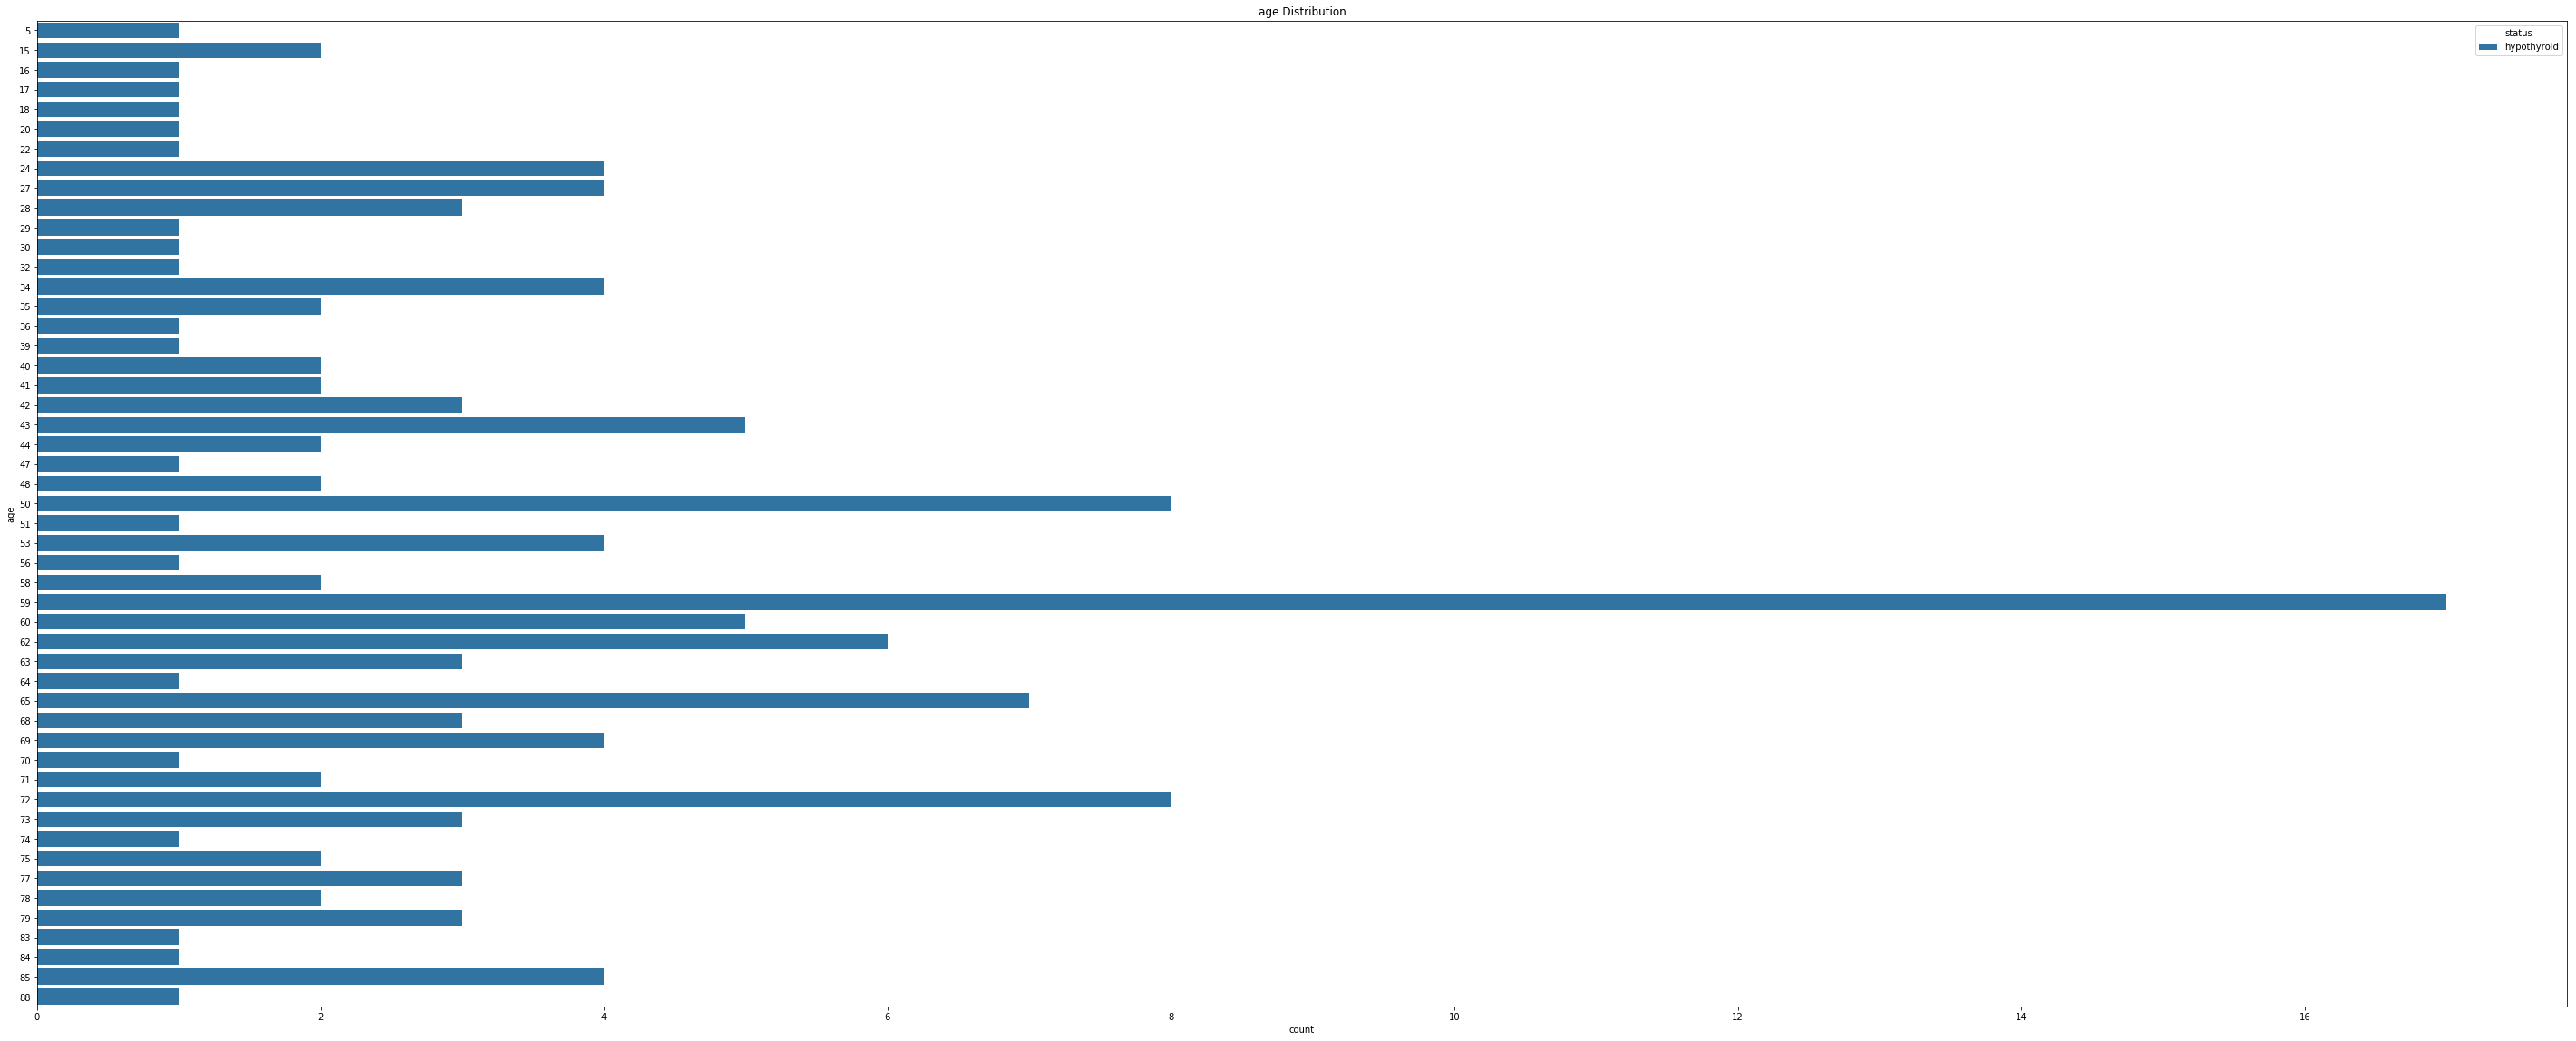

In [0]:
ax = plt.subplots(figsize=(50,20))
sns.countplot(y='age',hue ='status',data=hypo).set_title('age Distribution');

Our distribution is uneven, meaning that the age does not affect who contracts the disease.

In [0]:
hypo2 = hypo.groupby('sex')
hypo2.count()

,status,age,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
sex,,,,,,,,,,,,,,,,,,,,,,,,,
f,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104
m,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37


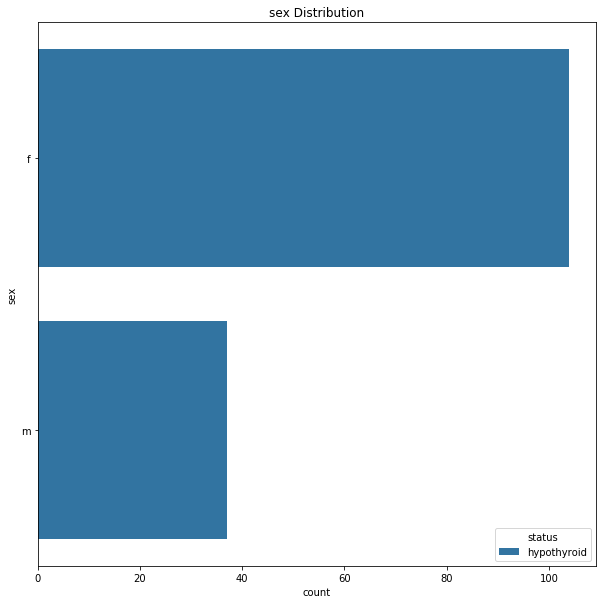

In [0]:
ax = plt.subplots(figsize=(10,10))
sns.countplot(y='sex',hue ='status',data=hypo).set_title('sex Distribution');

this goes to  show that female are affected more by the disease than male and the patients who's gender was not specified.

In [0]:
hypo.on_antithyroid_medication.value_counts()

f    140
t      1
Name: on_antithyroid_medication, dtype: int64

In [0]:
hypo.on_thyroxine.value_counts()

f    129
t     12
Name: on_thyroxine, dtype: int64

In [0]:
hypo.thyroid_surgery.value_counts()

f    131
t     10
Name: thyroid_surgery, dtype: int64

In [0]:
hypo.pregnant.value_counts()

f    140
t      1
Name: pregnant, dtype: int64

In [0]:
hypo.sick.value_counts()

f    139
t      2
Name: sick, dtype: int64

In [0]:
hypo.tumor.value_counts()

f    141
Name: tumor, dtype: int64

In [0]:
hypo.lithium.value_counts()

f    141
Name: lithium, dtype: int64

In [0]:
hypo.goitre.value_counts()

f    137
t      4
Name: goitre, dtype: int64

In [0]:
hypo.TSH_measured.value_counts()

y    140
n      1
Name: TSH_measured, dtype: int64

In [0]:
hypo.T3_measured.value_counts()

y    128
n     13
Name: T3_measured, dtype: int64

In [0]:
hypo.TT4_measured.value_counts()

y    141
Name: TT4_measured, dtype: int64

In [0]:
hypo.T4U_measured.value_counts()

y    141
Name: T4U_measured, dtype: int64

In [0]:
hypo.FTI_measured.value_counts()

y    141
Name: FTI_measured, dtype: int64

In [0]:
hypo.TBG_measured.value_counts()

n    138
y      3
Name: TBG_measured, dtype: int64

From the above analysis, we realise that the symptomps(columns) that we will mainly focus on are the following:
'status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
     

The sick,tumor, lithium and goitre columns proved insignificant since almost all the patients recorded no sign of the above.

Let us confirm all these using modelling

In [0]:
hypo.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

<Figure size 1008x2160 with 0 Axes>

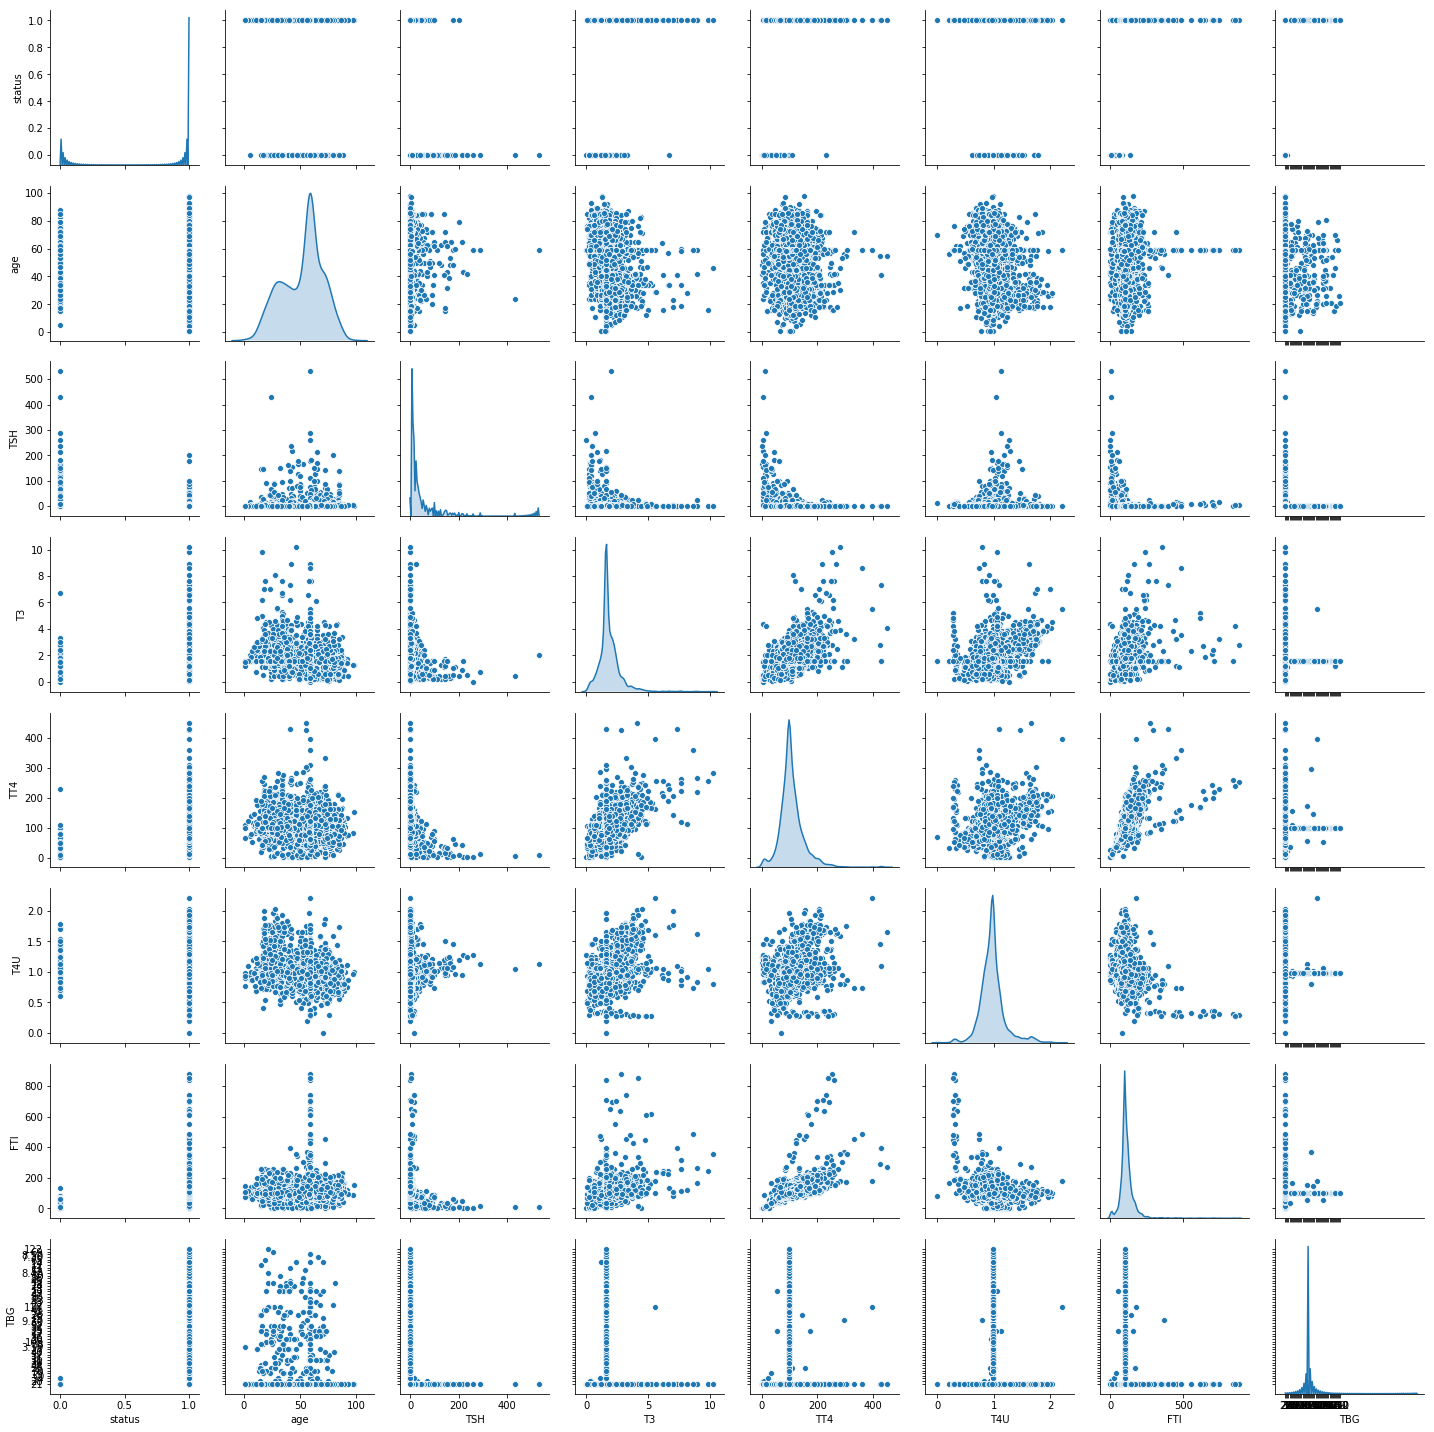

In [275]:
#Crossplots distribution
plt.figure(figsize=(14, 30))
sns.pairplot(df, diag_kind='kde');
plt.show()

#Modelling

**CatBoost Method**

In [0]:
#I first used catboost method since we were dealing with categorical data in this case.


In [0]:
#I will first define my independent and dependent variable...x and y respectively.
x = df.drop('status', inplace=False,axis=1).values.reshape(-1,1)
y = df[['status']].values.reshape(-1,1)

In [0]:
b = ['status']
z = df[b]
y = pd.get_dummies(z)
y.head()

,status_hypothyroid,status_negative
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [0]:
a = ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG']
s = df[a]
x = pd.get_dummies(s)


In [0]:
#checking my x 
x.head()

,age,TSH,T3,TT4,T4U,FTI,sex_f,sex_m,on_thyroxine_f,on_thyroxine_t,query_on_thyroxine_f,query_on_thyroxine_t,on_antithyroid_medication_f,on_antithyroid_medication_t,thyroid_surgery_f,thyroid_surgery_t,query_hypothyroid_f,query_hypothyroid_t,query_hyperthyroid_f,query_hyperthyroid_t,pregnant_f,pregnant_t,sick_f,sick_t,tumor_f,tumor_t,lithium_f,lithium_t,goitre_f,goitre_t,TSH_measured_n,TSH_measured_y,T3_measured_n,T3_measured_y,TT4_measured_n,TT4_measured_y,T4U_measured_n,T4U_measured_y,FTI_measured_n,FTI_measured_y,...,TBG_19,TBG_20,TBG_21,TBG_22,TBG_23,TBG_24,TBG_25,TBG_26,TBG_27,TBG_28,TBG_29,TBG_3.10,TBG_30,TBG_31,TBG_32,TBG_33,TBG_34,TBG_35,TBG_36,TBG_37,TBG_38,TBG_39,TBG_40,TBG_41,TBG_43,TBG_45,TBG_47,TBG_48,TBG_50,TBG_52,TBG_53,TBG_63,TBG_65,TBG_69,TBG_7.30,TBG_8.40,TBG_8.50,TBG_80,TBG_86,TBG_9.30
0,72,30.0,0.6,15.0,1.48,10.0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,15,145.0,1.7,19.0,1.13,17.0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,24,0.0,0.2,4.0,1.00,0.0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,24,430.0,0.4,6.0,1.04,6.0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,77,7.3,1.2,57.0,1.28,44.0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [0]:
pip install catboost

     |████████████████████████████████| 62.5MB 2.9MB/s 


In [0]:
#importing my libraries and building my model
from catboost import CatBoostClassifier
from catboost import Pool, CatBoostRegressor
from catboost import CatBoostRegressor
categorical_features_indices = np.where(x.astype != np.float)[0]
model = CatBoostRegressor(iterations = 100, depth = 3, learning_rate = 0.1, loss_function = 'RMSE')
model.fit(x_train, y_train, cat_features = categorical_features_indices, eval_set = (x_test, y_test), plot = True)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.1955063	test: 0.1820383	best: 0.1820383 (0)	total: 67ms	remaining: 6.63s
1:	learn: 0.1806859	test: 0.1680521	best: 0.1680521 (1)	total: 77.3ms	remaining: 3.79s
2:	learn: 0.1697265	test: 0.1578331	best: 0.1578331 (2)	total: 81.5ms	remaining: 2.63s
3:	learn: 0.1615777	test: 0.1507133	best: 0.1507133 (3)	total: 85ms	remaining: 2.04s
4:	learn: 0.1539545	test: 0.1427265	best: 0.1427265 (4)	total: 88.6ms	remaining: 1.68s
5:	learn: 0.1462725	test: 0.1355554	best: 0.1355554 (5)	total: 92.5ms	remaining: 1.45s
6:	learn: 0.1375251	test: 0.1272394	best: 0.1272394 (6)	total: 96ms	remaining: 1.27s
7:	learn: 0.1299392	test: 0.1200864	best: 0.1200864 (7)	total: 101ms	remaining: 1.16s
8:	learn: 0.1243258	test: 0.1144800	best: 0.1144800 (8)	total: 105ms	remaining: 1.07s
9:	learn: 0.1181576	test: 0.1084411	best: 0.1084411 (9)	total: 109ms	remaining: 982ms
10:	learn: 0.1130834	test: 0.1033118	best: 0.1033118 (10)	total: 113ms	remaining: 915ms
11:	learn: 0.1090154	test: 0.0995164	best: 0.099516

In [0]:
print(model.get_params())

{'loss_function': 'RMSE', 'depth': 3, 'learning_rate': 0.1, 'iterations': 100}


In [0]:
print(model.get_best_score())

{'learn': {'RMSE': 0.06923016409984656}, 'validation': {'RMSE': 0.07916814487335642}}


We got a very low RMSE score meaning that our model is a good fit.

**Decision Tree optimization with RandomForest**

In [0]:
from sklearn.model_selection import train_test_split
#splitting the independent and dependent variables


In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [0]:
#importing the model
from sklearn.ensemble import RandomForestClassifier

In [0]:
#fitting the model
forest = RandomForestClassifier(n_estimators = 100, random_state = 0, min_samples_split=20,max_depth = 5)
forest = forest.fit(x_train, y_train)

In [0]:
#predicting the model
y_pred = forest.predict(x_test)

In [0]:
#evaluation using confusion
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test.values.argmax(axis = 1), y_pred.argmax(axis = 1))
cm
a = accuracy_score(y_test, y_pred)
print('Accuracy', a)

Accuracy 0.9870550161812298


We achieved a 98% accuracy level, which basically means that this is a good model.

In [0]:
# Get numerical feature importances
tree = forest.estimators_[50]
importances = list(tree.feature_importances_)

# connecting each feature with its importance
# List of tuples with variable and importance
#test_features = df.columns.to_list()

test_features = x
feature_names = test_features
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 


[('age', 0.03), ('TSH', 0.9), ('T3', 0.04), ('TT4', 0.0), ('T4U', 0.0), ('FTI', 0.0), ('sex_f', 0.0), ('sex_m', 0.01), ('on_thyroxine_f', 0.0), ('on_thyroxine_t', 0.0), ('query_on_thyroxine_f', 0.0), ('query_on_thyroxine_t', 0.0), ('on_antithyroid_medication_f', 0.0), ('on_antithyroid_medication_t', 0.0), ('thyroid_surgery_f', 0.0), ('thyroid_surgery_t', 0.0), ('query_hypothyroid_f', 0.0), ('query_hypothyroid_t', 0.0), ('query_hyperthyroid_f', 0.0), ('query_hyperthyroid_t', 0.0), ('pregnant_f', 0.0), ('pregnant_t', 0.0), ('sick_f', 0.0), ('sick_t', 0.0), ('tumor_f', 0.0), ('tumor_t', 0.0), ('lithium_f', 0.0), ('lithium_t', 0.0), ('goitre_f', 0.0), ('goitre_t', 0.0), ('TSH_measured_n', 0.0), ('TSH_measured_y', 0.02), ('T3_measured_n', 0.0), ('T3_measured_y', 0.0), ('TT4_measured_n', 0.0), ('TT4_measured_y', 0.0), ('T4U_measured_n', 0.0), ('T4U_measured_y', 0.0), ('FTI_measured_n', 0.0), ('FTI_measured_y', 0.0), ('TBG_measured_n', 0.0), ('TBG_measured_y', 0.0), ('TBG_0', 0.0), ('TBG_108'

In [0]:
[print('Variable: {} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: TSH Importance: 0.9
Variable: T3 Importance: 0.04
Variable: age Importance: 0.03
Variable: TSH_measured_y Importance: 0.02
Variable: sex_m Importance: 0.01
Variable: TT4 Importance: 0.0
Variable: T4U Importance: 0.0
Variable: FTI Importance: 0.0
Variable: sex_f Importance: 0.0
Variable: on_thyroxine_f Importance: 0.0
Variable: on_thyroxine_t Importance: 0.0
Variable: query_on_thyroxine_f Importance: 0.0
Variable: query_on_thyroxine_t Importance: 0.0
Variable: on_antithyroid_medication_f Importance: 0.0
Variable: on_antithyroid_medication_t Importance: 0.0
Variable: thyroid_surgery_f Importance: 0.0
Variable: thyroid_surgery_t Importance: 0.0
Variable: query_hypothyroid_f Importance: 0.0
Variable: query_hypothyroid_t Importance: 0.0
Variable: query_hyperthyroid_f Importance: 0.0
Variable: query_hyperthyroid_t Importance: 0.0
Variable: pregnant_f Importance: 0.0
Variable: pregnant_t Importance: 0.0
Variable: sick_f Importance: 0.0
Variable: sick_t Importance: 0.0
Variable: tumo

This gives us the variables that are of most importance to the classification of the dataset which are:TSH Importance: 0.9
: T3 Importance: 0.04
: age Importance: 0.03
: TSH_measured_y Importance: 0.02
: sex_m Importance: 0.01

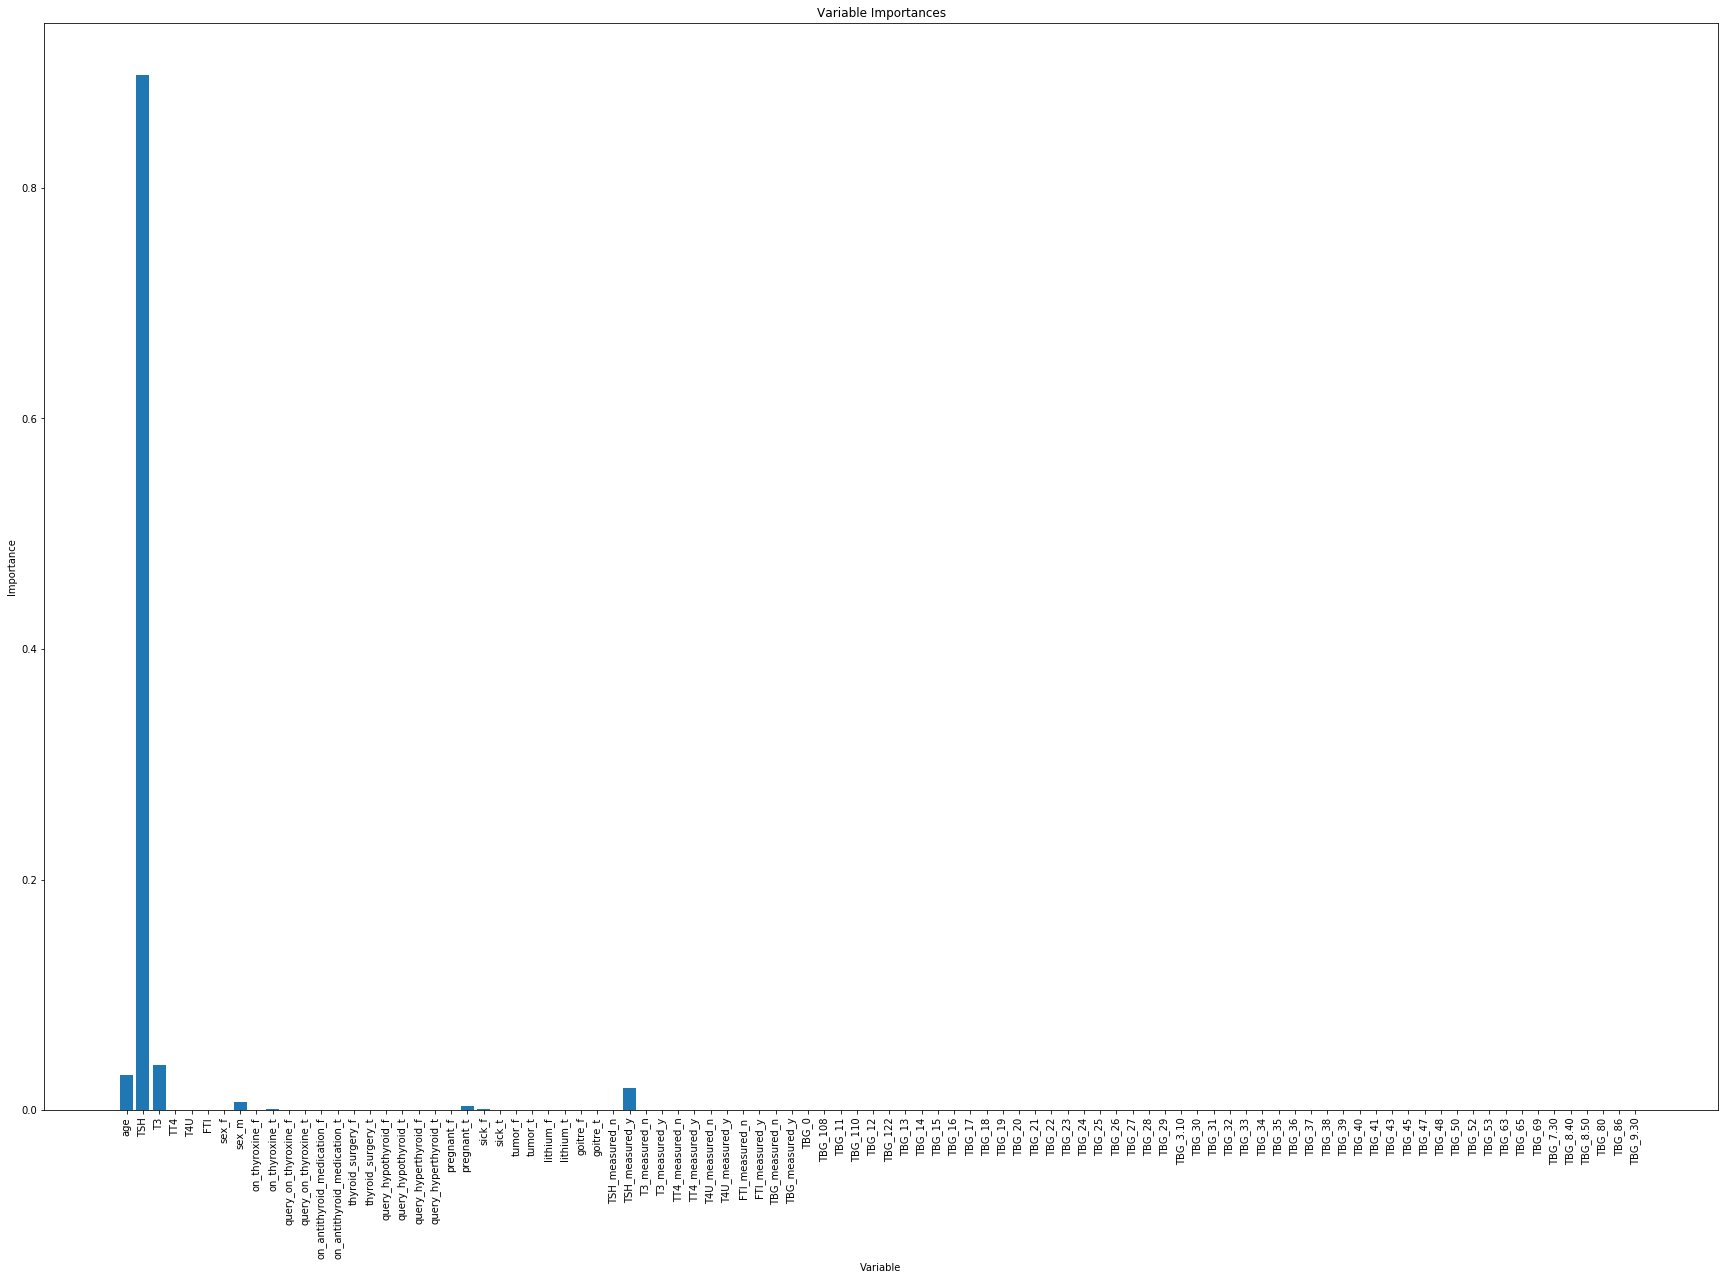

In [0]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
ax = plt.subplots(figsize=(30,20))

# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, test_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');


**Decision Trees optimization with GradientBoost**

In [0]:
x = df.drop('status', inplace=False,axis=1).values
y = df['status']

In [168]:
x.values
y.values

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]], dtype=uint8)

In [207]:
#importing Label Encoder
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['status'] = le.fit_transform(df['status'])
df['status'].unique()

array([0, 1])

In [0]:
a = ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG']
s = df[a]
x = pd.get_dummies(s)


In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


# Train using 80% of the data.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

tree = DecisionTreeClassifier()

# Train it on our training set.
tree = tree.fit(x_train, y_train)

# Predict based on the model we've trained, note that we apply it to the whole data set this time
y_pred_tree = tree.predict(x)

In [226]:
x.shape

(3086, 94)

In [225]:
# Implementing cross validation
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold, cross_val_score
classifier = []
res = []
names = []
classifier.append(('GradientBoost',  GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_depth= 4)))
for name, model in classifier:
 kfold = KFold(n_splits=5, random_state=0)
 cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
 res.append(cv_results)
 names.append(name)
 msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
 print(msg)

GradientBoost: 0.990678 (0.005382)


We got an accuracy of 99.06785 which is a really good model outcome.

**Support Vector Machine**

In [0]:
#  Split the data into train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)


In [0]:
#fitting our model
from sklearn.svm import SVC,LinearSVC
svm_model = SVC(kernel = 'linear', random_state=0)


In [233]:
svm_model.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [234]:
#predicting with the test set
y_pred = svm_model.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [235]:
model_accuracy = accuracy_score(y_test, y_pred)
model_accuracy

0.988673139158576

In [236]:
#we can as well evaluate this model using the confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[ 19,   6],
       [  1, 592]])

In [0]:
Accuracy score fecorded is 98.867% which defines this as a good model.

**Support Vector Machine: Polynomial function**

In [256]:
#importing Label Encoder
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['status'] = le.fit_transform(df['status'])
df['status'].unique()

array([0, 1])

In [0]:
a = ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG']
s = df[a]
x = pd.get_dummies(s)


In [0]:
#Polynomial Function
#  Split the data into train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)


In [0]:
#building the model
#we used the gamma parameter to improve performance
polyclassifier = SVC(kernel = 'poly', degree = 2, gamma='auto_derecated')


In [269]:
#fitting the model into the training set
polyclassifier.fit(x_train,y_train)

TypeError: ignored

In [270]:
#making predictions
y_pred = polyclassifier.predict(x_test)


NotFittedError: ignored

In [271]:
# Model Evaluation
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9644012944983819


TypeError: ignored

**Support Vector Machine: Radial basis function(rbf)**

In [0]:
#building my model
rbfclassifier = SVC(kernel = 'rbf')

In [264]:
#Training the model
rbfclassifier.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
#making predictions
y_pred = rbfclassifier.predict(x_test)

In [272]:
# Model Evaluation
print( accuracy_score(y_test, y_pred))


0.9644012944983819


we have arrived at an accuracy score of 96.44% which is a good model score.

# Challenging my solution

The variables that are of most importance to a classification of whether a patient has hypothyroid or not is best predicted by the following columns:
TSH Importance: 0.9
: T3 Importance: 0.04
: age Importance: 0.03
: TSH_measured_y Importance: 0.02
: sex_m Importance: 0.01

Not to say that the rest are not important, but doctors should highly consider these symptoms so as to consider whether a patient has hypothyroid or not.
